Physics 3700 Lab 0
by Dallas Collie

In [2]:
import numpy as np

# pulling average temperature data from file
avg_temperature = np.loadtxt("weatherstats_vancouver_daily.csv", delimiter=",", usecols=(3), skiprows=(1))

PART I - Mean

TASK 1a

In [102]:
def mean(*lst):
    '''This function will return the mean of a list of numbers'''
    entries = len(lst)          # find how many entries in the list
    total = 0
    for num in lst:            
        total = total + num     # sum every number in the list
    mean = total/entries        # find the mean of the list
    return mean                 # return the mean


TASK 1b

In [103]:
# calculating the mean using the function I created
mean_ave_temp = mean(*avg_temperature)

TASK 1c

In [139]:
print ('The mean average temperature using my function is %.3f\xb0C.'%(mean_ave_temp))

The mean average temperature via manual calculation is 10.590°C.


TASK 1d

In [140]:
# mean of the average temperature from file using numpy function
mean_ave_temp_np = np.mean(avg_temperature)
print ('The mean average temperature using a numpy function is %.3f\xb0C.'%(mean_ave_temp_np))

The mean average temperature via a numpy function is 10.590°C.


In [105]:
# compare the means calcuated by my fucnction and the numpy function
round(mean_ave_temp,3) == round(mean_ave_temp_np,3)

True

The function for mean I created matches the function in numpy to 3 decimal places. 

TASK 2 - Standard Deviation

TASK 2a

In [106]:
def std_dev(*lst):
    '''This function will return the standard deviation of a list of numbers'''
    entries = len(lst)          # find how many entries in the list
    total = 0
    for num in lst:            
        total = total + num     # sum every number in the list
    mean = total/entries        # find the mean of the list
    sum_squares = 0
    sum_lst = 0
    for item in lst:            
        sum_squares = sum_squares + item**2    # loop to sum the squares of list entries
        sum_lst = sum_lst + item               # loop to sum the list entries
    std = (1/(entries-1)*(sum_squares - sum_lst**2/entries))**.5 # runninig stats std calculation
    return std                  # return the standard deviation

TASK 2b

In [107]:
# calculating the standard deviation of the average temperature data using the function I created
std_ave_temp = std_dev(*avg_temperature)

TASK 2c

In [201]:
print ("The average temperature caculated using my function is: %.3f\u00b0C" %std_ave_temp) 

The average temperature caculated manually is: 5.797°C


TASK 2d

In [27]:
print ("The average temperature caculated using a numpy function is: %.3f\u00b0C" %np.std(avg_temperature))

The average temperature caculated using numpy is: 5.797°C


In [28]:
# compare the standard deviations calculated by my function and the numpy function
round(std_dev(*avg_temperature),3) == round(np.std(avg_temperature),3)

True

The function for standard deviation I created matches the function in numpy to 3 decimal places.

TASK 3 - Histogram

In [57]:
def histogram(min_range, max_range, num_bins,norm,*lst):
    bin_width = (max_range - min_range)/num_bins
    
  
    # getting locations of bins and save to an array
    
    num = min_range+(bin_width/2)      # first loaction of bin
    i = 0
    bin_locations = []
    while (i < num_bins):
        bin_locations.append((num))    # put location of bin in an array
        num = num+bin_width            # advance to the next location of bin
        i += 1
    
    # finding all numbers that are in the range and fit them in a bin
    #    and excluding others by making them less than 0 
    range_list = [math.floor((item-min_range)/bin_width) if (item >= min_range and item <= max_range) else -item for item in lst]
    j=0
    bin_counts = []
    while (j < num_bins):
        bin_counts.append(range_list.count(j))  # count the number of occurances for each bin
        j += 1
        
    if (norm == True):    # if user wants the data normalized
        range_values = max(bin_counts)-min(bin_counts)
        norm_bin_counts = []
        for x in bin_counts:
            norm_bin_counts.append((x-min(bin_counts))/range_values)    # normalize the data set and save to array
        bin_data = [norm_bin_counts,bin_locations]  # making the normalized bin data into one 2D array
    else:
        bin_data = [bin_counts,bin_locations]       # making the bin data in one 2D array
    return (bin_data)

In [6]:
import math
import matplotlib.pyplot as plt

In [91]:
# setting range and number of bins and retrieving that data
min_range = -10
max_range = 30
num_bins = 30
norm1 = False
bin_width = (max_range - min_range)/num_bins
ave_temp_histogram_data = histogram(min_range,max_range,num_bins,norm1,*avg_temperature)

In [92]:
# finding the mean and standard deviation of data retrieved
result = []
occurances = ave_temp_histogram_data[0]
temperatures = ave_temp_histogram_data[1]
for i1, i2 in zip(occurances,temperatures):  
    result.append(i1*i2)                       # muliply the two data sets and saving to a new array
mean_hist = sum(result)/sum(occurances)        # calculating the mean of the histogram data sets
print(mean_hist)

result2 = []
for i3, i4 in zip(occurances,temperatures):
    result2.append(i3*(i4-mean_hist)**2)       # finding the deviation from the mean, squaring and multiplying by occurances
std_hist = (sum(result2)/sum(occurances))**.5  # calculating the standard deviation of the histogram data sets
print(std_hist)


10.598926559322598
5.805700658018811


In [93]:
bin_height = occurances
bin_location = temperatures

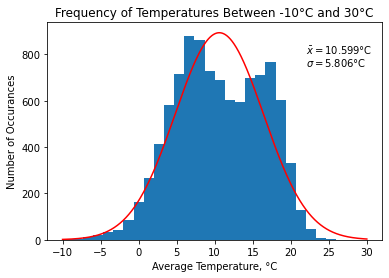

In [137]:
fig = plt.figure()
x_axis = np.arange(-10, 30, 0.01)
plt.bar(bin_location,bin_height,bin_width)   
plt.plot(x_axis, (norm.pdf(x_axis,mean_hist,std_hist))*13000, "r-")
plt.text(22, 800, r'$\bar{x}=$%.3f' u'\xb0C' % (mean_hist)) 
plt.text(22, 750, r'$\sigma=$%.3f'u'\xb0C' % (std_hist))
plt.title('Frequency of Temperatures Between -10\xb0C and 30\xb0C')
plt.ylabel('Number of Occurances')
plt.xlabel('Average Temperature, \xb0C')
plt.savefig("YVR_Ave_Temp_Histo.pdf", dpi=150)
plt.show()

In [136]:
ave_temp_numpy_histogram_data = np.histogram(avg_temperature,num_bins,(min_range,max_range))

# finding the mean and standard deviation of data retrieved
result_np = []
occurances_np = ave_temp_numpy_histogram_data[0]
temperatures_np = ave_temp_numpy_histogram_data[1]
for i1, i2 in zip(occurances_np,temperatures_np):  
    result_np.append(i1*i2)                       # muliply the two data sets and saving to a new array
mean_hist_np = sum(result_np)/sum(occurances_np)        # calculating the mean of the histogram data sets
print(mean_hist_np)

result2_np = []
for i3, i4 in zip(occurances_np,temperatures_np):
    result2_np.append(i3*(i4-mean_hist_np)**2)       # finding the deviation from the mean, squaring and multiplying by occurances
std_hist_np = (sum(result2_np)/sum(occurances_np))**.5  # calculating the standard deviation of the histogram data sets
print(std_hist_np)


9.93225989265593
5.805700658018811


In [116]:
bin_height_np = occurances
bin_location_np = temperatures

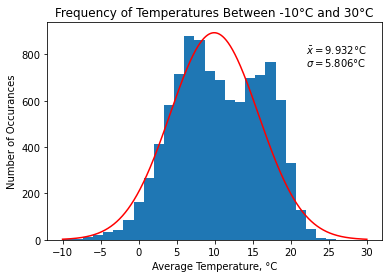

In [138]:

plt.bar(bin_location_np,bin_height_np,bin_width)   
plt.plot(x_axis, (norm.pdf(x_axis,mean_hist_np,std_hist_np))*13000, "r-")
plt.text(22, 800, r'$\bar{x}=$%.3f' u'\xb0C' % (mean_hist_np)) 
plt.text(22, 750, r'$\sigma=$%.3f'u'\xb0C' % (std_hist_np))
plt.title('Frequency of Temperatures Between -10\xb0C and 30\xb0C')
plt.ylabel('Number of Occurances')
plt.xlabel('Average Temperature, \xb0C')
plt.savefig("YVR_Ave_Temp_Histo_Numpy.pdf", dpi=150)
plt.show()

NOTE: I'm not sure why, but all the "temperatures" data that comes from numpy.histogram is lower than than my data by 0.6666667. Otherwise my bin data matches numpy bin data. I am willing to say that mine data is correct as my mean matches more closely with the mean of the full data set. 

In [135]:
difference = []
for i1, i2 in zip(ave_temp_numpy_histogram_data[1],ave_temp_histogram_data[1]):  
    difference.append(i2-i1) 
print (difference)

[0.6666666666666661, 0.6666666666666661, 0.666666666666667, 0.6666666666666661, 0.6666666666666661, 0.6666666666666661, 0.6666666666666654, 0.6666666666666665, 0.6666666666666659, 0.6666666666666652, 0.6666666666666661, 0.6666666666666652, 0.6666666666666643, 0.6666666666666652, 0.6666666666666661, 0.6666666666666643, 0.6666666666666661, 0.6666666666666679, 0.6666666666666661, 0.6666666666666679, 0.6666666666666679, 0.6666666666666643, 0.6666666666666643, 0.6666666666666643, 0.6666666666666607, 0.6666666666666643, 0.6666666666666607, 0.6666666666666572, 0.6666666666666607, 0.6666666666666572]
